# Case 2: regular fracture network

Import the definitions of the plot routines:

In [1]:
import plotroutines as pr
import matplotlib.pyplot as plt
plt.rc('text', usetex=False) # don't use Latex as Binder currently fails, see https://github.com/jupyterhub/binderhub/issues/1143

Select if the fracture network is conductive (`0`) or blocking (`1`):

In [2]:
cond = 1

Choose a refinement index, `0` indicating the coarsest meshes (1k cells), `1` the intermediate ones (10k cells) and `2` the finest ones (100k cells):

In [3]:
ref_index = 2

Choose the places and methods that should be evaluated. The names have to be consistent with the folder names in `../results`:

In [4]:
# once the Latex issue is fixed, replace "_" by "\_"
places_and_methods = {
    "UiB": ["TPFA", "MPFA", "MVEM", "RT0"],
    "USTUTT": ["MPFA", "TPFA_Circ"],
    "LANL": ["MFD"],
    "UNICE_UNIGE": ["VAG_Cont", "HFV_Cont", "VAG_Disc", "HFV_Disc"],
    "ETHZ_USI": ["FEM_LM"],
    "UNICAMP": ["Hybrid_Hdiv"],
    "UNIL_USI": ["FE_AMR_AFC"],
    "DTU": ["FEM_COMSOL"]
};

Plot the hydraulic head over *line* by looping through all places and methods, taking the data from the files `dol_cond_{0,1}_refinement_{0,1,2}.csv` in the corresponding folders. This corresponds to Figure 9 in the paper.

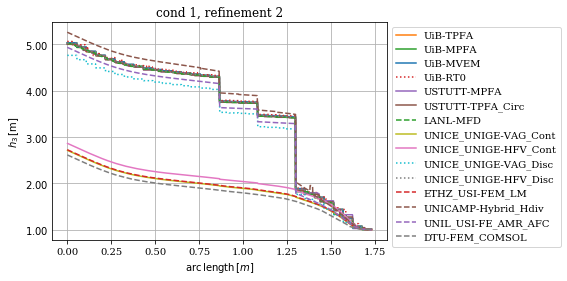

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
title = "cond " + str(cond) + ", refinement " + str(ref_index)

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dol_cond_" + str(cond) + "_refinement_" + str(ref_index) + ".csv"
        label = place + "-" + method

        pr.plot_over_line(data, label, ref_index, title, cond, ax,
                          pr.linestyle[place][method], pr.color[place][method])

Plot the *temporal* evolution of the average tracer concentration in matrix regions 1,  10 and 11, taking the data from the files `dot_cond_{0,1}.csv` in the corresponding folders. This reproduces parts of Figure 10.

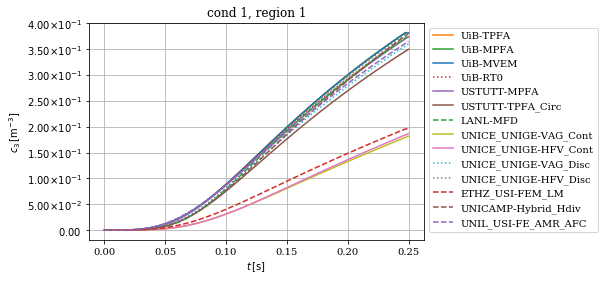

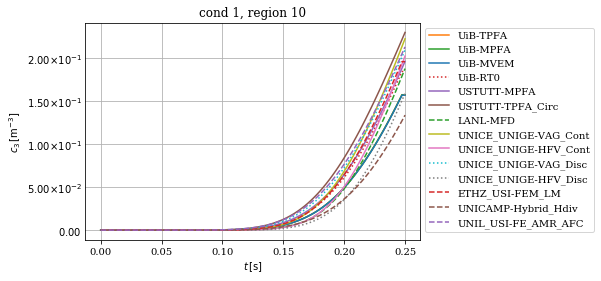

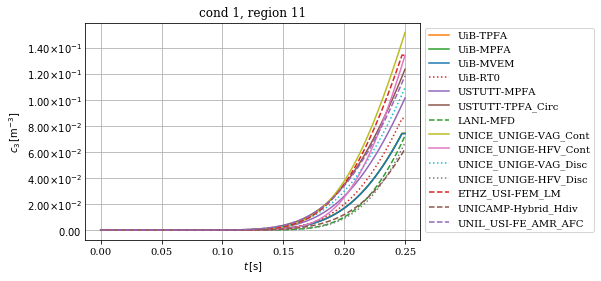

In [6]:
regions = [1, 10, 11]

# remove DTU as they didn't provide concentration results
if places_and_methods.get("DTU"):
    places_and_methods.pop("DTU")

for region_pos, region in enumerate(regions):
    fig = plt.figure()
    ax = fig.add_subplot()
    title = "cond " + str(cond) + ", region " + str(region)

    for place in places_and_methods:
        for method in places_and_methods[place]:
            folder = "../results/" + place + "/" + method + "/"
            data = folder.replace("\\", "") + "/dot_cond_" + str(cond) + ".csv"
            label = place + "-" + method

            pr.plot_over_time(data, label, title, cond, region, region_pos, len(regions), ax,
                              lineStyle=pr.linestyle[place][method],
                              clr=pr.color[place][method])